In [32]:
# 데이터 : sklearn.datasets의 MNIST ==> 디지털 숫자 0~9 손글씨 데이터셋
# 피쳐 : 이미지 픽셀 수, 28*28=784
# 타켓 : 0~9, 총 10개
# 학습유형 : 지도학습 + 분류

In [33]:
from sklearn.datasets import fetch_openml
import pandas as pd

if False : # 일회용 코드 
    mnist = fetch_openml('mnist_784', as_frame=True) # 숫자 데이터를 사용할 것임
    mnist.frame.to_csv("num.csv", index=False)
    targetDF=mnist.target
    targetDF=targetDF.astype('int')
    targetDF.to_csv("ans.csv", index=False)

In [34]:
featureDF=pd.read_csv("num.csv")/255 # MinMax 스케일러 적용
targetDF=pd.read_csv("ans.csv")["class"]

In [35]:
# from sklearn.model_selection import train_test_split
# # 학습용 & 테스트용 분리 => MNIST database에서 제공한 6만개와 1만개 분리 
# x_train,x_test,y_train,y_test=train_test_split(featureDF,targetDF,test_size=0.2,random_state=42)

In [36]:
x_train=featureDF.iloc[:60000]
y_train=targetDF.iloc[:60000]
x_test=featureDF.iloc[60000:]
y_test=targetDF.iloc[60000:]
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(f"x_test : {x_test.shape}, y_test : {y_test.shape}")

x_train : (60000, 785), y_train : (60000,)
x_test : (10000, 785), y_test : (10000,)


In [37]:
# 학습용 & 검증용 분리 => 학습용 데이터셋에서 일부를 검증용으로 준비
# 검증용 : 학습 시 모델 최적화가 잘 되는지 검사하는 데이터셋
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3,stratify=y_train,random_state=5)
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(f"x_val : {x_val.shape}, y_val : {y_val.shape}")

x_train : (42000, 785), y_train : (42000,)
x_val : (18000, 785), y_val : (18000,)


In [38]:
# 학습 진행
# 분류 방법 : Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression(max_iter=10000)
lr_model.fit(x_train,y_train)


LogisticRegression(max_iter=10000)

In [39]:
lr_model.n_iter_

array([753])

In [40]:
train_score=lr_model.score(x_train,y_train)
test_score=lr_model.score(x_val, y_val)
print(f'train_score : {train_score}, test_score:{test_score}')

train_score : 0.9449285714285715, test_score:0.9195


In [52]:
# 확률적 경사 하강법 기반 학습
# 대량의 데이터를 학습 시 랜덤으로 데이터셋 1개를 추출해서 학습 진행 => 최적화 
# 장점 : 속도 빨라짐
# 단점 : 정확도 떨어짐
# 개선 : 일정 데이터를 묶어서 학습 후 최적화 진행 => 미니배치 (Mini-batch Gradient Descent) 
# 학습모델 선정 필요

# 분류 알고리즘을 SGD방법속의 파라미터를 지정해 학습 진행
from sklearn.linear_model import SGDClassifier
# Logistic Regression 알고리즘으로 학습 진행
lr_sgd=SGDClassifier(loss="log_loss", random_state=5)
lr_sgd.fit(x_train,y_train)

SGDClassifier(loss='log_loss', random_state=5)

In [54]:
lr_sgd.n_iter_

24

In [55]:
train_score=lr_sgd.score(x_train,y_train)
test_score=lr_sgd.score(x_val, y_val)
print(f'train_score : {train_score}, test_score:{test_score}')

train_score : 0.9193095238095238, test_score:0.9086666666666666


In [61]:
print(lr_sgd.coef_.shape) # (10,784) : ovr이니까 10가지 분류에 대한 각 컬럼별(784개) 계수가 있다
print(lr_sgd.intercept_.shape) # 상수항도 10개

(10, 785)
(10,)


In [59]:
# 추가데이터가 있다면, partiap_fit로 
import numpy as np
lr_sgd.partial_fit(x_val, y_val, np.unique(y_val))

SGDClassifier(loss='log_loss', random_state=5)

In [60]:
train_score=lr_sgd.score(x_train,y_train)
test_score=lr_sgd.score(x_val, y_val)
print(f'train_score : {train_score}, test_score:{test_score}')

train_score : 0.9245, test_score:0.9178333333333333


In [41]:
# 분류 모델 성능평가 => accuracy, precision, recall, f1-score => classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report # 대표적인 분류 평가 지표
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # tn, fp, fn, tp 행렬 출력 기능

In [63]:
y_pre=lr_sgd.predict(x_test)
y_true=y_test

In [64]:
accuracy_score(y_true,y_pre) # 정확도 : 순서를 지켜주어야 한다! 

0.9177

In [66]:
precision_score(y_true,y_pre, average="micro") # 정밀도

0.9177

In [67]:
recall_score(y_true,y_pre, average="micro") # 재현율

0.9177

In [68]:
f1_score(y_true,y_pre, average="micro") # f1_score

0.9177

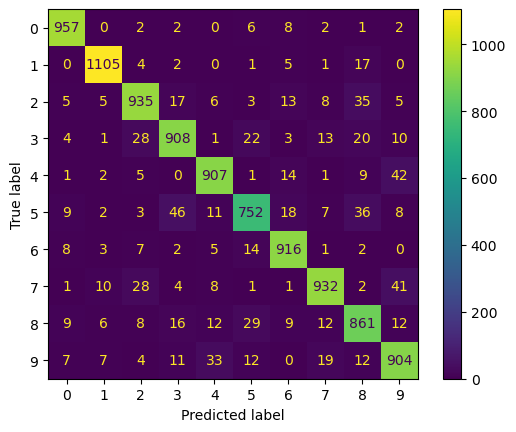

In [70]:
conplot=ConfusionMatrixDisplay(confusion_matrix(y_true,y_pre))
conplot.plot()